In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
import shutil
import os
from scipy.optimize import curve_fit
from numpy.polynomial.polynomial import Polynomial
from tqdm import tqdm
import seaborn as sns

# CloudVolume and Cave setup
from cloudvolume import CloudVolume
from caveclient import CAVEclient
 
sv = CloudVolume('graphene://https://minnie.microns-daf.com/segmentation/table/zheng_ca3', use_https=True, lru_bytes=int(1e8))
client = CAVEclient('zheng_ca3')
auth = client.auth

import pcg_skel

### Negative (Sparsely Thorny Preferring)

/var/folders/bz/l7hrgw1544v9fdn5yxzlp_r80000gp/T/ipykernel_1234/3171613115.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_data[['x', 'y', 'z']] = cell_data[['x', 'y', 'z']].astype(int)
/var/folders/bz/l7hrgw1544v9fdn5yxzlp_r80000gp/T/ipykernel_1234/3171613115.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_data[['x', 'y', 'z']] = cell_data[['x', 'y', 'z']].astype(int)
Downloading: 100%|████████████████████████████| 1/1 [00:00<00:00,  3.64it/s]
/var/folders/bz/l7hrgw1544v9fdn5yxzlp_r80000gp/T/ipykernel_1234/3171613115.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

Downloading: 100%|████████████████████████████| 1/1 [00:00<00:00,  3.75it/s]


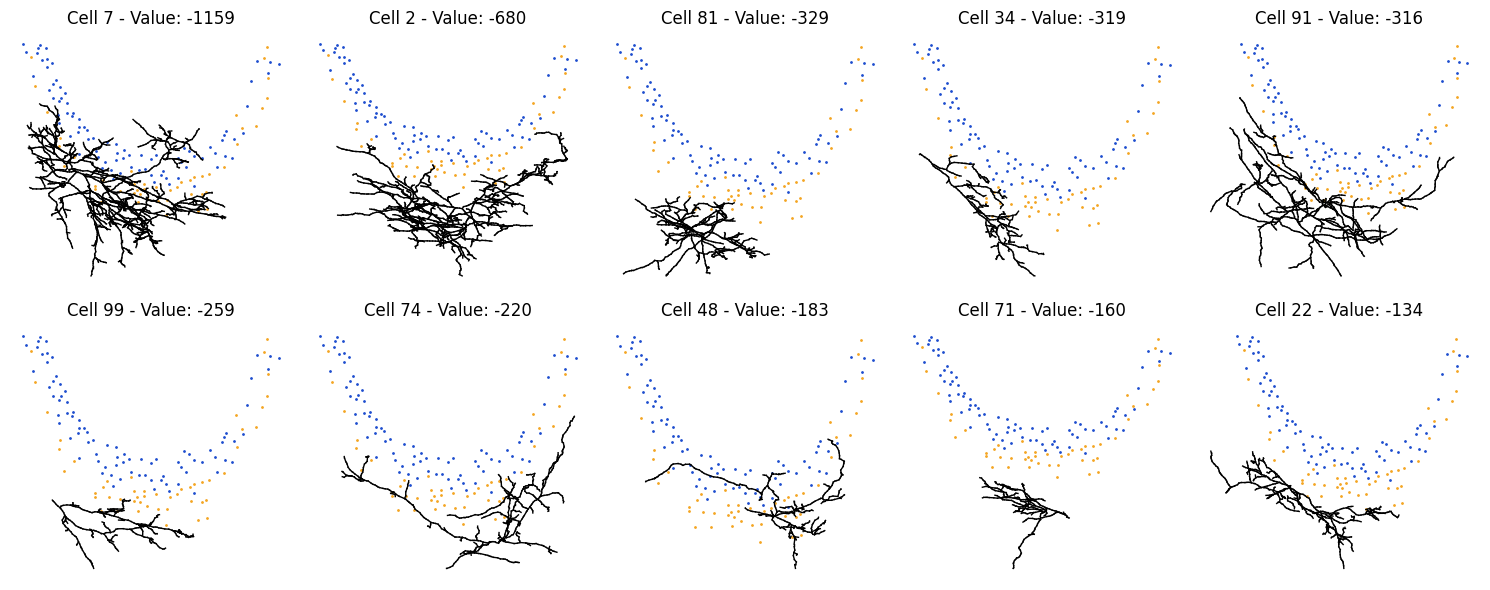

In [2]:
# Load the dataset
df = pd.read_csv('ca3_coms_20240730042146-Copy1.csv')
new_pyr_large_thorny = pd.read_csv('large_thorny_for_top10_fig.csv')
new_pyr_small_athorny = pd.read_csv('small_athorny_for_top10_fig.csv')
df_4 = pd.read_csv('inhibitory_240102 - 10.inhibitory_axons.csv')

# Define bold colors
bold_blue = "#1E4ECF"   # Dodger Blue
#bold_orange = "#FF8C00" # Dark Orange
bold_red = "#F4A623"    # Crimson

# Color palette
colors = sns.color_palette("bright", 5)

# Get the top 10 largest values in the `Large - small` column
N = 10
largest_n = df_4['Large - small'].nsmallest(N)

# Define a fixed figure size and aspect ratio for subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # Aspect ratio maintained
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through the top 10 cells and plot each one in a subplot
for i, idx in enumerate(largest_n.index):
    ax = axes[i]

    # Process the cell data again for plotting
    cell_data = df_4.loc[idx]
    cell_data[['x', 'y', 'z']] = cell_data[['x', 'y', 'z']].astype(int)
    coordinates_list = cell_data[['x', 'y', 'z']].values.tolist()
    voxel_IDs = sv.scattered_points(coordinates_list)
    voxel_ID_list = list(voxel_IDs.values())
    df_segid = client.chunkedgraph.get_roots(voxel_ID_list)

    root_id = df_segid[0]
    skel = pcg_skel.pcg_skeleton(root_id=root_id, client=client, root_point_resolution=True)

    vertices = skel.vertices  # The original vertices from the skeleton
    scale_factors = np.array([18, 18, 45])
    scaled_vertices = vertices / scale_factors
    edges = skel.edges  # Edges from the skeleton object to connect vertices
    
    ax.scatter(new_pyr_small_athorny['x'], new_pyr_small_athorny['y'], color=bold_red, s=1, alpha=1, label='Athorny')
    ax.scatter(new_pyr_large_thorny['x'], new_pyr_large_thorny['y'], color=bold_blue, s=1, alpha=1, label='Thorny')
    
    # Plot skeleton edges
    for edge in edges:
        point1 = scaled_vertices[edge[0]]
        point2 = scaled_vertices[edge[1]]
        xs, ys = [point1[0], point2[0]], [point1[1], point2[1]]  # Project onto X-Y
        ax.plot(xs, ys, color='black', lw=1.0)

    # Add title to each subplot
    ax.set_title(f'Cell {cell_data["index"]} - Value: {cell_data["Large - small"]}')
    ax.axis('off')  # Turn off axes for better visualization

# Hide any unused subplots
for i in range(N, len(axes)):
    axes[i].axis('off')

# Adjust layout to avoid overlapping elements
plt.tight_layout()

# Save as a high-resolution image with proportional scaling
plt.savefig('top_10_cells_negative_5x5_highres_250219_.png', dpi=900, bbox_inches='tight')

plt.show()

### Positive (Thorny Preferring)

/var/folders/bz/l7hrgw1544v9fdn5yxzlp_r80000gp/T/ipykernel_1234/1526137851.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_data[['x', 'y', 'z']] = cell_data[['x', 'y', 'z']].astype(int)
/var/folders/bz/l7hrgw1544v9fdn5yxzlp_r80000gp/T/ipykernel_1234/1526137851.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_data[['x', 'y', 'z']] = cell_data[['x', 'y', 'z']].astype(int)
Downloading: 100%|████████████████████████████| 1/1 [00:00<00:00,  4.39it/s]
/var/folders/bz/l7hrgw1544v9fdn5yxzlp_r80000gp/T/ipykernel_1234/1526137851.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

Downloading: 100%|████████████████████████████| 1/1 [00:00<00:00,  4.37it/s]


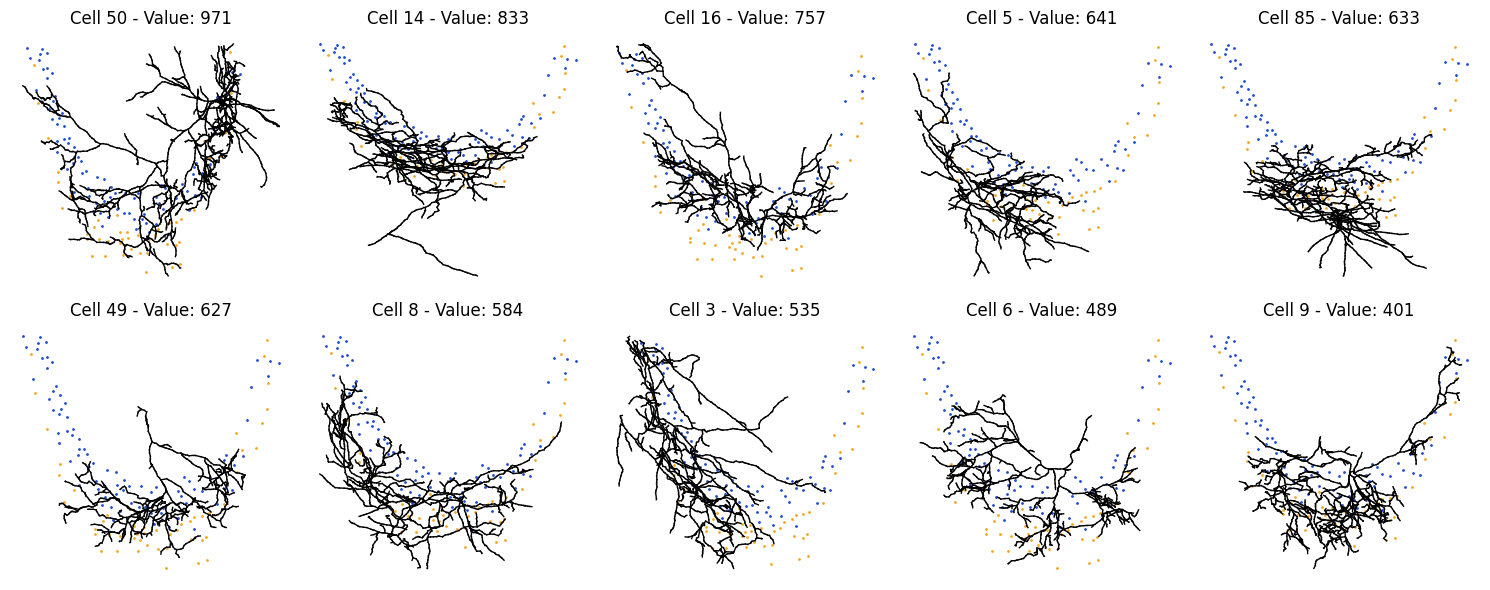

In [4]:
# Load the dataset
df = pd.read_csv('ca3_coms_20240730042146-Copy1.csv')
new_pyr_large_thorny = pd.read_csv('large_thorny_for_top10_fig.csv')
new_pyr_small_athorny = pd.read_csv('small_athorny_for_top10_fig.csv')
df_4 = pd.read_csv('inhibitory_240102 - 10.inhibitory_axons.csv')

# Define bold colors
bold_blue = "#1E4ECF"   # Dodger Blue
bold_red = "#F4A623"    # Crimson

# Color palette
colors = sns.color_palette("bright", 5)

# Get the top 10 largest values in the `Large - small` column
N = 10
largest_n = df_4['Large - small'].nlargest(N)

# Define a fixed figure size and aspect ratio for subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # Aspect ratio maintained
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through the top 10 cells and plot each one in a subplot
for i, idx in enumerate(largest_n.index):
    ax = axes[i]

    # Process the cell data again for plotting
    cell_data = df_4.loc[idx]
    cell_data[['x', 'y', 'z']] = cell_data[['x', 'y', 'z']].astype(int)
    coordinates_list = cell_data[['x', 'y', 'z']].values.tolist()
    voxel_IDs = sv.scattered_points(coordinates_list)
    voxel_ID_list = list(voxel_IDs.values())
    df_segid = client.chunkedgraph.get_roots(voxel_ID_list)

    root_id = df_segid[0]
    skel = pcg_skel.pcg_skeleton(root_id=root_id, client=client, root_point_resolution=True)

    vertices = skel.vertices  # The original vertices from the skeleton
    scale_factors = np.array([18, 18, 45])
    scaled_vertices = vertices / scale_factors
    edges = skel.edges  # Edges from the skeleton object to connect vertices
  
    ax.scatter(new_pyr_small_athorny['x'], new_pyr_small_athorny['y'], color=bold_red, s=1, alpha=1, label='Athorny')
    ax.scatter(new_pyr_large_thorny['x'], new_pyr_large_thorny['y'], color=bold_blue, s=1, alpha=1, label='Thorny')
    
    # Plot skeleton edges
    for edge in edges:
        point1 = scaled_vertices[edge[0]]
        point2 = scaled_vertices[edge[1]]
        xs, ys = [point1[0], point2[0]], [point1[1], point2[1]]  # Project onto X-Y
        ax.plot(xs, ys, color='black', lw=1.0)

    # Add title to each subplot
    ax.set_title(f'Cell {cell_data["index"]} - Value: {cell_data["Large - small"]}')
    ax.axis('off')  # Turn off axes for better visualization

# Hide any unused subplots
for i in range(N, len(axes)):
    axes[i].axis('off')

# Adjust layout to avoid overlapping elements
plt.tight_layout()

# Save as a high-resolution image with proportional scaling
plt.savefig('top_10_cells_negative_5x5_highres_250219_.png', dpi=900, bbox_inches='tight')

plt.show()

### Pyr Cells Only

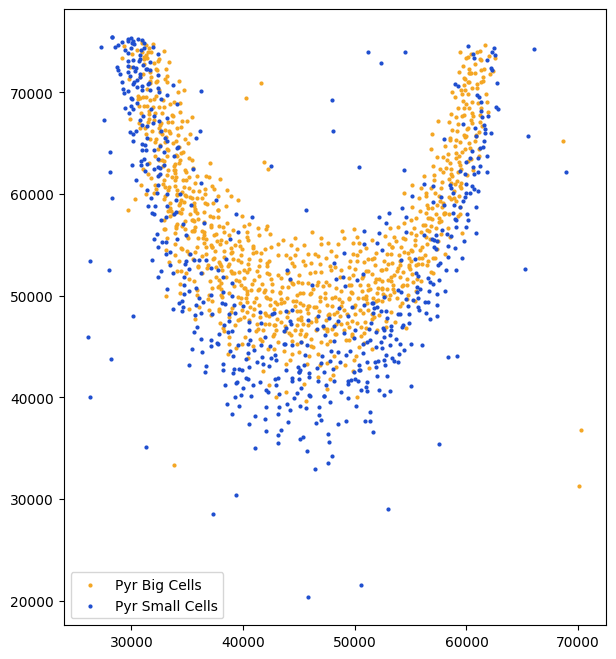

In [5]:
# Define bold colors
bold_blue = "#1E4ECF"   # Dodger Blue
bold_red = "#F4A623"    # Crimson

df = pd.read_csv('ca3_coms_20240730042146-Copy1.csv')

size_limit = (24999, 2500)
brown_cells = df[(df['size'] >= size_limit[1]) & (df['size'] <= size_limit[0])]
    
size_limit = (64999, 25000)
orange_cells = df[(df['size'] >= size_limit[1]) & (df['size'] <= size_limit[0])]
    
size_limit = (109999, 65000)
purple_cells = df[(df['size'] >= size_limit[1]) & (df['size'] <= size_limit[0])]
    
size_limit = (231999, 110000)
blue_cells = df[(df['size'] >= size_limit[1]) & (df['size'] <= size_limit[0])]
    
size_limit = (311999, 232000)
red_cells = df[(df['size'] >= size_limit[1]) & (df['size'] <= size_limit[0])]
    
size_limit = (450000, 312000)
green_cells = df[(df['size'] >= size_limit[1]) & (df['size'] <= size_limit[0])]

# Define the color palette
colors = sns.color_palette("bright", 5)

# Plot the scatter plot
plt.figure(figsize=(7, 8))
plt.scatter(green_cells['x'], green_cells['y'], color=bold_red, marker='o', s=4, label='Pyr Big Cells')
plt.scatter(red_cells['x'], red_cells['y'], color=bold_blue, marker='o', s=4, label='Pyr Small Cells')

# Add legend for only Green, Red, and Blue Cells
plt.legend(loc='lower left')

# Save as a high-resolution image for publication
plt.savefig('scatterplot_publication_quality_justpyrcells.png', dpi=600)

plt.show()